<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-шагу-1" data-toc-modified-id="Выводы-по-шагу-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по шагу 1</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-шагу-2" data-toc-modified-id="Выводы-по-шагу-2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы по шагу 2</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#3.1-Dummy-регрессор" data-toc-modified-id="3.1-Dummy-регрессор-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1 Dummy регрессор</a></span></li><li><span><a href="#3.2-Линейная-регрессия" data-toc-modified-id="3.2-Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.2 Линейная регрессия</a></span></li><li><span><a href="#3.3-Случайный-лес" data-toc-modified-id="3.3-Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3.3 Случайный лес</a></span></li><li><span><a href="#3.4-Градиентный-бустинг-с-помощью-LightGBM" data-toc-modified-id="3.4-Градиентный-бустинг-с-помощью-LightGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>3.4 Градиентный бустинг с помощью LightGBM</a></span></li><li><span><a href="#3.5-Градиентный-бустинг-с-помощью-CatBoost" data-toc-modified-id="3.5-Градиентный-бустинг-с-помощью-CatBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>3.5 Градиентный бустинг с помощью CatBoost</a></span></li><li><span><a href="#Выводы-по-шагу-3" data-toc-modified-id="Выводы-по-шагу-3-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выводы по шагу 3</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#4.1-Линейная-регрессия" data-toc-modified-id="4.1-Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>4.1 Линейная регрессия</a></span></li><li><span><a href="#4.2-Случайный-лес" data-toc-modified-id="4.2-Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>4.2 Случайный лес</a></span></li><li><span><a href="#4.3-LightGBM" data-toc-modified-id="4.3-LightGBM-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>4.3 LightGBM</a></span></li><li><span><a href="#4.4-CatBoost" data-toc-modified-id="4.4-CatBoost-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>4.4 CatBoost</a></span></li><li><span><a href="#Выводы-по-шагу-4" data-toc-modified-id="Выводы-по-шагу-4-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выводы по шагу 4</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

#  Прогнозирование спроса на такси

Заказчик: оператор такси.

Цель: построить модель для предсказания количества заказов такси на следующий час.

Заказчик предоставил исторические данные о заказах такси в аэропортах.

Критерий успешности: метрика *RMSE* на тестовой выборке <= 48.

План:
1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

Количество заказов находится в столбце `num_orders`.

## Подготовка

Загрузка и ресемплирование данных

In [2]:
# импорты и общие настройки проекта
import pandas as pd
import time

#import math
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

#включим отображение всех столбцов таблиц и округлим числа до тысячных
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 80
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
# загружаем файл с данными
try:
    df = pd.read_csv('datasets/data_15/taxi.csv', sep=',', index_col=[0], parse_dates=[0]) # locally hosted datafile ## , sep='\t'
except:
    df = pd.read_csv('/datasets/taxi.csv', sep=',', index_col=[0], parse_dates=[0]) # Yandex-hosted datafile  ## , sep='\t'

# общий анализ структуры и состава загруженного файла
df.info()
display(df.sample(5))
display(df.describe())
#print('\nПолных дубликатов:', df.duplicated().sum())
#print("\nЧисло пропусков в данных:\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-06-29 04:30:00,10
2018-04-29 08:30:00,19
2018-08-01 10:10:00,16
2018-07-22 16:30:00,22
2018-05-18 14:10:00,21


,num_orders
count,"26,496.000"
mean,14.070
std,9.211
min,0.000
25%,8.000
50%,13.000
75%,19.000
max,119.000


In [4]:
print(df.index.is_monotonic)

True


Индекс монотонно возрастает, какие-либо корректирующие действия с рядом не требуются

In [5]:
# ресемплинг данных по часам
df = df.resample('1H').sum()
# также будет инстересно посмотреть на сезонность по дням
df_day = df.resample('1D').sum()

print(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


### Выводы по шагу 1

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Данные успешно загружены с преобразованием типов и созданием индекса-даты
* Пропущенных значений нет, временной ряд монотонно возрастает, дополнительная предобработка не требуется.
* Проведён ресемплинг данных в разрезы "1 час" и "1 день"

## Анализ

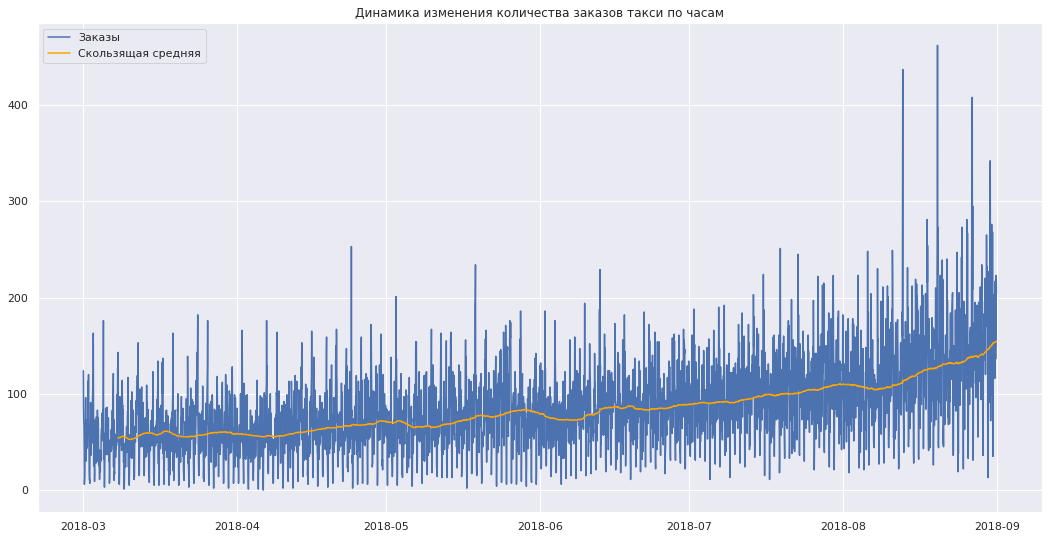

In [6]:
# Построим график со скользящей средней. Ширина окна - неделя.
rolling_mean = df.rolling(24*7).mean()

plt.figure(figsize=(18,9))
plt.title("Динамика изменения количества заказов такси по часам")

plt.plot(df, label="Заказы")
plt.plot(rolling_mean, label="Скользящая средняя", color='orange')
plt.legend(loc="upper left")

За представленные полгода наблюдается неуклонный рост среднего значения заказов. Необходимо более подробно изучить  сезонность в данных.

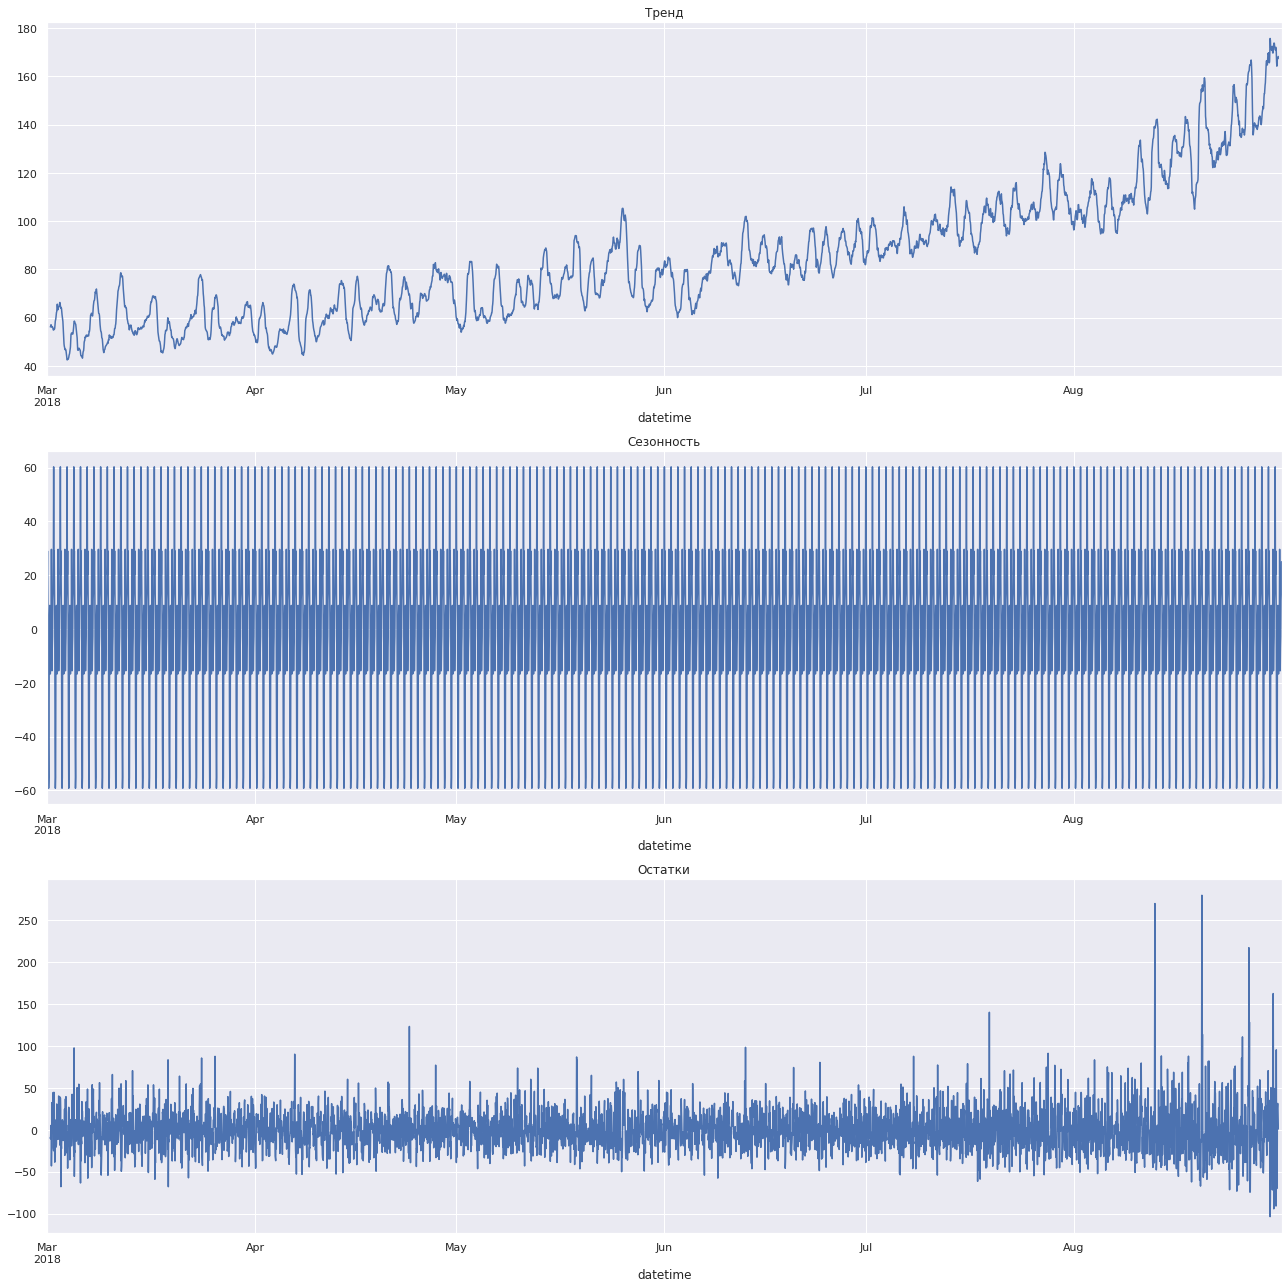

In [7]:
# разбираем датасет на три составляющих сезонности
decomposed = seasonal_decompose(df)

plt.figure(figsize=(18, 18))

plt.subplot(311)
plt.title('Тренд')
decomposed.trend.plot(ax=plt.gca())

plt.subplot(312)
plt.title('Сезонность')
decomposed.seasonal.plot(ax=plt.gca())

plt.subplot(313)
plt.title('Остатки')
decomposed.resid.plot(ax=plt.gca())

plt.tight_layout()

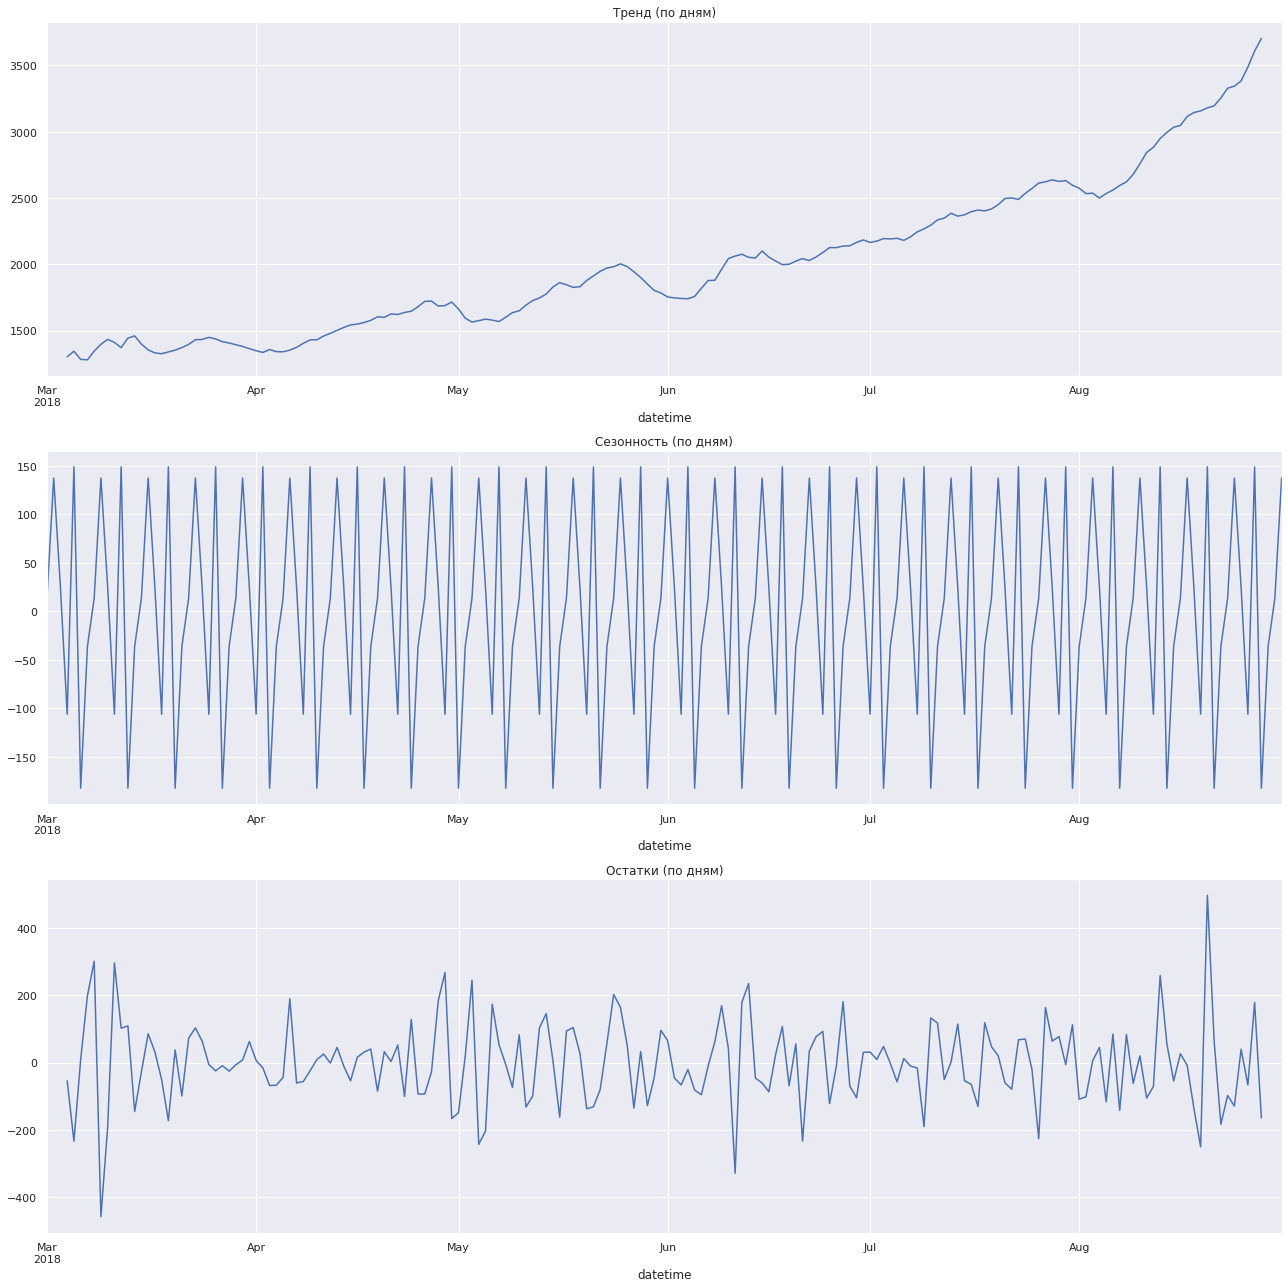

In [8]:
# разбираем датасет на три составляющих сезонности
decomposed_day = seasonal_decompose(df_day)

plt.figure(figsize=(18, 18))

plt.subplot(311)
plt.title('Тренд (по дням)')
decomposed_day.trend.plot(ax=plt.gca())

plt.subplot(312)
plt.title('Сезонность (по дням)')
decomposed_day.seasonal.plot(ax=plt.gca())

plt.subplot(313)
plt.title('Остатки (по дням)')
decomposed_day.resid.plot(ax=plt.gca())

plt.tight_layout()

Очевидно, сезонность есть. Посмотрим на неё в более детальных разрезах.

<AxesSubplot:title={'center':'Сезонность заказов в пределах недели (по часам)'}, xlabel='datetime'>

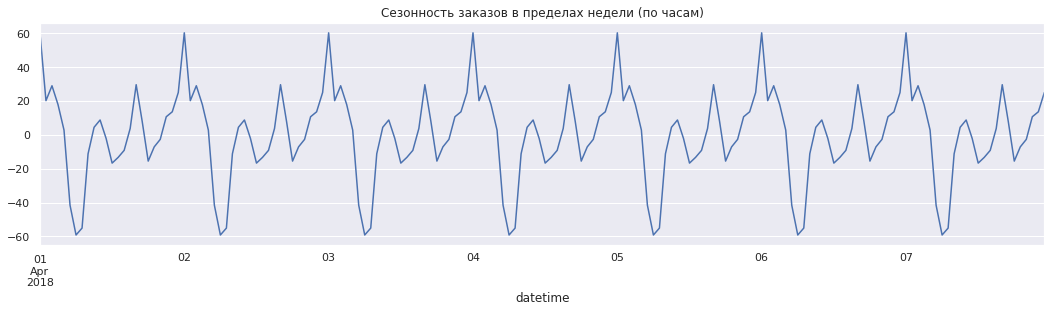

In [9]:
plt.figure(figsize=(18,9))

plt.subplot(211)
plt.title("Сезонность заказов в пределах недели (по часам)")
decomposed.seasonal['2018-04-01':'2018-04-07'].plot(ax=plt.gca())

<AxesSubplot:title={'center':'Сезонность заказов в пределах месяца (по дням)'}, xlabel='datetime'>

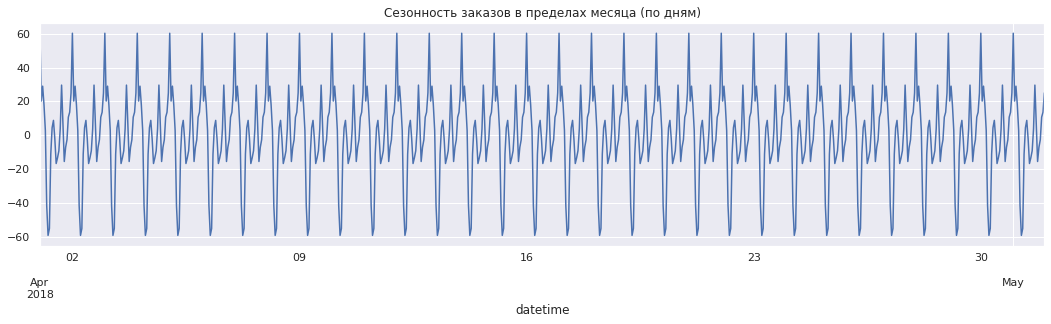

In [10]:
plt.figure(figsize=(18,9))

plt.subplot(211)
plt.title("Сезонность заказов в пределах месяца (по дням)")
decomposed.seasonal['2018-04-01':'2018-05-01'].plot(ax=plt.gca())

<AxesSubplot:title={'center':'Сезонность заказов в пределах суток'}, xlabel='datetime'>

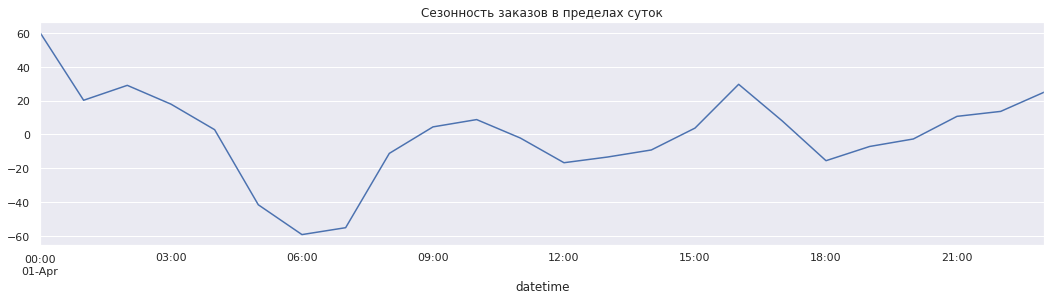

In [11]:
plt.figure(figsize=(18,9))

plt.subplot(211)
plt.title("Сезонность заказов в пределах суток")
decomposed.seasonal['2018-04-01':'2018-04-01 23:59:59'].plot(ax=plt.gca())

Профиль изменения заказов похож на реальные события:
* утренний пик примерно до 10:00, вечерний пик в районе 16:00. Ближе к окончанию рабочего времени в "пробочных" городах использование такси становится долгим и затратным хобби.
* ночной пик людей, возвращающихся домой, посещающих ночные увеселительные заведения или приезжающих-уезжающих ночных туристов.

Несмотря на то, что профили по дням визуально схожи, необходимо оценить их повторяемость.
Для этого используем статистический критерий стационарности временного ряда Дики — Фуллера.

In [12]:
df_metric = sm.tsa.stattools.adfuller(df['num_orders'])[1]

print(f"Проверка гипотезы о нестационарности временного ряда, p-value критерия DF: {round(df_metric, 3)}")

Проверка гипотезы о нестационарности временного ряда, p-value критерия DF: 0.029


При выбранном 5%-ом уровне значимости (р<0,05) гипотеза о нестационарности временного ряда не принимается, далее считаем ряд стационарным.

### Выводы по шагу 2

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Проведён визуальный анализ данных спомощью скользящей средней с окном длиной в неделю
* Выявлен тренд роста в рамках 6-месячного диапазона данных
* Выявлена почасовая сезонность в течение дня
* Ряд монотонен и стационарен

## Обучение

Перед обучением моделей необходимо добавить дополнительные факторы.

Так как в проекте идёт речь о краткосрочном прогнозировании и мы располагаем небольшим датасетом, факторы вида "год" и "месяц" добвлять нет смысла.

Будут добавлены:
* Час
* Номер дня недели
* Скользящая средняя со смещением на сутки
* Несколько смещений (лагов) в числе заказов.

Для этого адаптируем под задачу функицю make_features() из блока теории.

In [13]:
def make_features(data_in, max_lag, rolling_mean_size):
    data = data_in.copy()
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    for lag in range(1, max_lag+1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
    return data

In [14]:
df_features = make_features(df, 2, 24)
df_features.info()
df_features.head(30)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   hour          4416 non-null   int64  
 2   dayofweek     4416 non-null   int64  
 3   rolling_mean  4392 non-null   float64
 4   lag_1         4415 non-null   float64
 5   lag_2         4414 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 241.5 KB


,num_orders,hour,dayofweek,rolling_mean,lag_1,lag_2
datetime,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,NaN,124.000,NaN
2018-03-01 02:00:00,71,2,3,NaN,85.000,124.000
2018-03-01 03:00:00,66,3,3,NaN,71.000,85.000
2018-03-01 04:00:00,43,4,3,NaN,66.000,71.000
2018-03-01 05:00:00,6,5,3,NaN,43.000,66.000
2018-03-01 06:00:00,12,6,3,NaN,6.000,43.000
2018-03-01 07:00:00,15,7,3,NaN,12.000,6.000
2018-03-01 08:00:00,34,8,3,NaN,15.000,12.000


Сформируем теренирующую и тестовую выборки, проверим их корректность

In [15]:
train, test = train_test_split(df_features, shuffle=False, test_size=0.1)

# удалим строки с неопределёнными значениями дополнительных факторов
train = train.dropna()

print("Train:")
print(train.shape)
print(train.index.is_monotonic)
print(train.index.min(), train.index.max())

print("\nTest:")
print(test.shape)
print(train.index.is_monotonic)
print(test.index.min(), test.index.max())

Train:
(3950, 6)
True
2018-03-02 00:00:00 2018-08-13 13:00:00

Test:
(442, 6)
True
2018-08-13 14:00:00 2018-08-31 23:00:00


In [16]:
target_column = 'num_orders'

target_train = train[target_column]
features_train = train.drop(target_column, axis=1)

target_test = test[target_column]
features_test = test.drop(target_column, axis=1)

In [17]:
# функция оценки с помощью метрики RMSE
def rmse_score(target, predictions):
    rmse = mean_squared_error(target, predictions, squared=False)
    return rmse

scorer = make_scorer(rmse_score, greater_is_better=False)

In [18]:
rmse_results = pd.DataFrame({
    'model': [],
    'hyper_params': [],
    'rmse':[]
})


# функция, добавляющая результаты в общую таблицу
def add_result(model_desc, hyper_params, rmse):
    rmse_results.loc[rmse_results.size] = [model_desc, hyper_params, rmse]
    rmse_results.drop_duplicates(inplace=True)

Данные готовы к обучению моделей.

Для экономии времени в подборе гиперпараметров будем использовать TimeSeriesSplit+RandomizedSearchCV вместо GridSearchCV.

In [19]:
#кросс-валидатор для временных рядов
tsscv = TimeSeriesSplit(n_splits=8)

### 3.1 Dummy регрессор

In [20]:
model = DummyRegressor(strategy='mean')
model.fit(features_train, target_train)
    
predictions = pd.Series(model.predict(features_test))
rmse = rmse_score(target_test, predictions)

add_result('DummyRegressor', "", rmse)
display(rmse_results)

,model,hyper_params,rmse
0,DummyRegressor,,84.650


### 3.2 Линейная регрессия

In [21]:
model_lr = LinearRegression()

parameters_lr = {
    'fit_intercept':[True,False]
}

grid_lr = RandomizedSearchCV(model_lr, parameters_lr, cv=tsscv, scoring=scorer, verbose=0, n_jobs=-1, n_iter=2)
grid_lr.fit(features_train, target_train)

add_result('LinearRegression', str(grid_lr.best_params_), grid_lr.best_score_)
display(rmse_results)

,model,hyper_params,rmse
0,DummyRegressor,,84.650
3,LinearRegression,{'fit_intercept': False},-31.360


### 3.3 Случайный лес

In [22]:
model_rf = RandomForestRegressor(random_state=12345)
    
params_rf = {
    'n_estimators': range(30, 151, 10),
    'max_depth': range(1,15)
}

grid_rf = RandomizedSearchCV(model_rf, params_rf, cv=tsscv, scoring=scorer, verbose=0, n_jobs=-1)
grid_rf.fit(features_train, target_train)

add_result('RandomForestRegressor', str(grid_rf.best_params_), grid_rf.best_score_)
display(rmse_results)

,model,hyper_params,rmse
0,DummyRegressor,,84.650
3,LinearRegression,{'fit_intercept': False},-31.360
6,RandomForestRegressor,"{'n_estimators': 70, 'max_depth': 10}",-24.763


### 3.4 Градиентный бустинг с помощью LightGBM

In [23]:
model_gbm = LGBMRegressor(random_state=12345)
    
params_gbm = {
    'n_estimators': [50, 100, 500],
    'num_leaves': [21, 31, 41], 
    'learning_rate':[0.01, .04, 0.06]
}

grid_gbm = RandomizedSearchCV(model_gbm, params_gbm, cv=tsscv, verbose=0, scoring=scorer)

grid_gbm.fit(features_train, target_train)


add_result('LGBMRegressor', str(grid_gbm.best_params_), grid_gbm.best_score_)
display(rmse_results)

,model,hyper_params,rmse
0,DummyRegressor,,84.650
3,LinearRegression,{'fit_intercept': False},-31.360
6,RandomForestRegressor,"{'n_estimators': 70, 'max_depth': 10}",-24.763
9,LGBMRegressor,"{'num_leaves': 41, 'n_estimators': 100, 'learning_rate': 0.04}",-24.429


### 3.5 Градиентный бустинг с помощью CatBoost

In [24]:
model_cbr = CatBoostRegressor(loss_function="RMSE", verbose=0)

params_cbr = {
    'learning_rate': [0.03, 0.1, 0.5],
    'iterations': [150, 500]
}

grid_cbr = RandomizedSearchCV(model_cbr, params_cbr, cv=tsscv, scoring=scorer, n_iter=6) #, verbose=0

grid_cbr.fit(features_train, target_train)


add_result('CatBoostRegressor', str(grid_cbr.best_params_), grid_cbr.best_score_)
display(rmse_results)

,model,hyper_params,rmse
0,DummyRegressor,,84.650
3,LinearRegression,{'fit_intercept': False},-31.360
6,RandomForestRegressor,"{'n_estimators': 70, 'max_depth': 10}",-24.763
9,LGBMRegressor,"{'num_leaves': 41, 'n_estimators': 100, 'learning_rate': 0.04}",-24.429
12,CatBoostRegressor,"{'learning_rate': 0.1, 'iterations': 150}",-24.602


### Выводы по шагу 3

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Обучены четыре модели (Линейная регрессия, случайный лес, LightGBM и CatBoost), для них подобраны оптимальные гиперпараметры
* Все модели использовали кросс-валидацию TimeSeriesSplit
* Адекватность моделей проверена с помощью DummyRegressor, модели адекватны
* Метрика качества RMSE всех моделей превосходит целевую (не более 48)
* Максимальное качество показали модели с гиперпараметрами:
    * RandomForestRegressor 	{'n_estimators': 70, 'max_depth': 10} 	-24.763
    * LGBMRegressor 	{'num_leaves': 41, 'n_estimators': 100, 'learning_rate': 0.04} 	-24.429
    * CatBoostRegressor 	{'learning_rate': 0.1, 'iterations': 150} 	-24.602
* При перезапуске проекта гиперпараметры и показатели качества могут отличаться из-за случайного характера подбора

## Тестирование

In [25]:
# функция оценки метрик качества и производительности модели
def calculate_model_performance(model, features_train, target_train, features_test, target_test):
    
    start_time_fit = time.time()
    model.fit(features_train, target_train)
    stop_time_fit = time.time()
    
    fit_time = stop_time_fit - start_time_fit
    
    start_time_predict = time.time()
    predictions = model.predict(features_test)
    stop_time_predict = time.time()
    
    predict_time = stop_time_predict - start_time_predict
    
    rmse = mean_squared_error(target_test, predictions, squared=False)
    
    return rmse, fit_time, predict_time

# создадим функцию для вывода графиков
def model_performance_plot (model, model_name, features_test, target_test):
    plt.figure(figsize=(16,8))
    plt.title(f"Реальные и предсказанные значения целевого признака, модель {model_name}")
    plt.plot(target_test, label='Реальные значения')
    predictions = pd.Series(model.predict(features_test), index=target_test.index)
    plt.plot(predictions, label ='Предсказания')
    plt.legend(loc="upper left")

In [26]:
model_performance = pd.DataFrame({
    'model': [],
    'hyper_params': [],
    'rmse':[],
    'fit_time': [],
    'predict_time':[],
    'total_time':[]
})


# функция, добавляющая результаты в общую таблицу
def get_performance(model_desc, hyper_params, model, features_train, target_train, features_test, target_test):
    rmse, fit_time, predict_time = calculate_model_performance(model,
                                                               features_train, target_train, features_test, target_test)
    total_time = fit_time + predict_time
    model_performance.loc[model_performance.size] = [model_desc, hyper_params, rmse, fit_time, predict_time, total_time]
    model_performance.drop_duplicates(inplace=True)

### 4.1 Линейная регрессия

,model,hyper_params,rmse,fit_time,predict_time,total_time
0,LinearRegression,{'fit_intercept': False},51.192,0.002,0.001,0.004


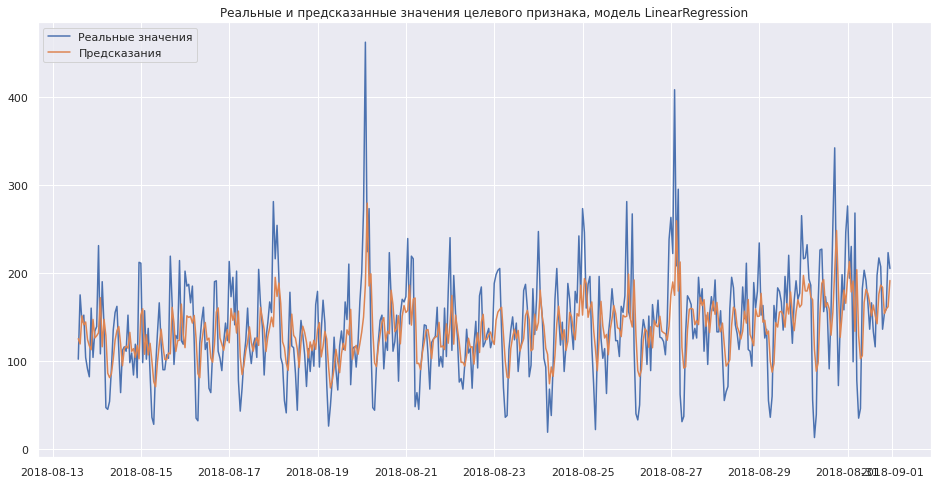

In [27]:
model = LinearRegression(**grid_lr.best_params_)

params = str(grid_lr.best_params_)
model_name = 'LinearRegression'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)
model_performance_plot(model, model_name, features_test, target_test)

### 4.2 Случайный лес

,model,hyper_params,rmse,fit_time,predict_time,total_time
0,LinearRegression,{'fit_intercept': False},51.192,0.002,0.001,0.004
6,RandomForestRegressor,"{'n_estimators': 70, 'max_depth': 10}",48.341,0.415,0.008,0.423


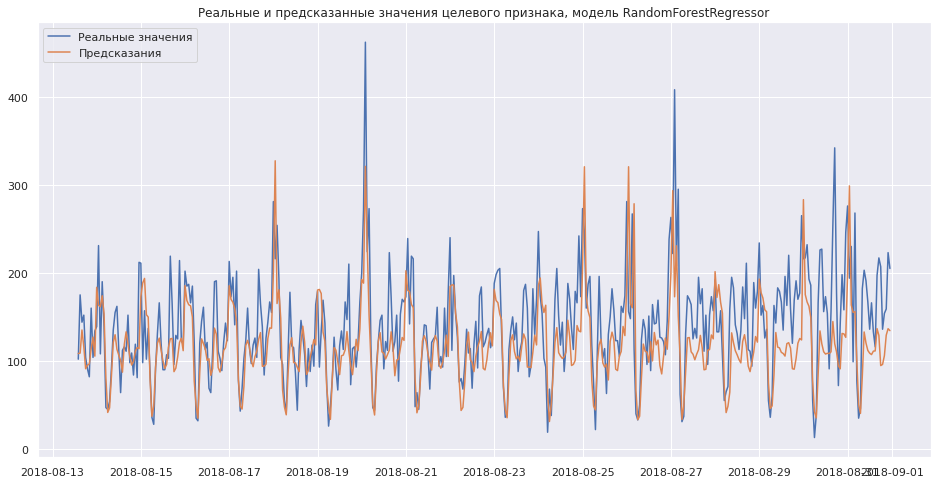

In [28]:
model = RandomForestRegressor(**grid_rf.best_params_, random_state=12345)
params = str(grid_rf.best_params_)
model_name = 'RandomForestRegressor'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)
model_performance_plot(model, model_name, features_test, target_test)

### 4.3 LightGBM

,model,hyper_params,rmse,fit_time,predict_time,total_time
0,LinearRegression,{'fit_intercept': False},51.192,0.002,0.001,0.004
6,RandomForestRegressor,"{'n_estimators': 70, 'max_depth': 10}",48.341,0.415,0.008,0.423
12,LGBMRegressor,"{'num_leaves': 41, 'n_estimators': 100, 'learning_rate': 0.04}",45.937,0.729,0.003,0.732


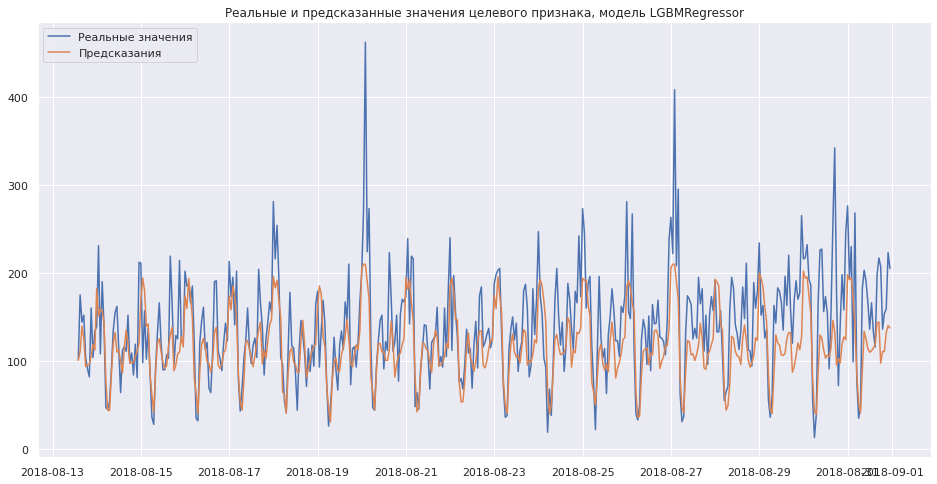

In [29]:
model = LGBMRegressor(**grid_gbm.best_params_, random_state=12345)

params = str(grid_gbm.best_params_)
model_name = 'LGBMRegressor'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)
model_performance_plot(model, model_name, features_test, target_test)

### 4.4 CatBoost

,model,hyper_params,rmse,fit_time,predict_time,total_time
0,LinearRegression,{'fit_intercept': False},51.192,0.002,0.001,0.004
6,RandomForestRegressor,"{'n_estimators': 70, 'max_depth': 10}",48.341,0.415,0.008,0.423
12,LGBMRegressor,"{'num_leaves': 41, 'n_estimators': 100, 'learning_rate': 0.04}",45.937,0.729,0.003,0.732
18,CatBoostRegressor,"{'learning_rate': 0.1, 'iterations': 150}",47.288,0.680,0.001,0.682


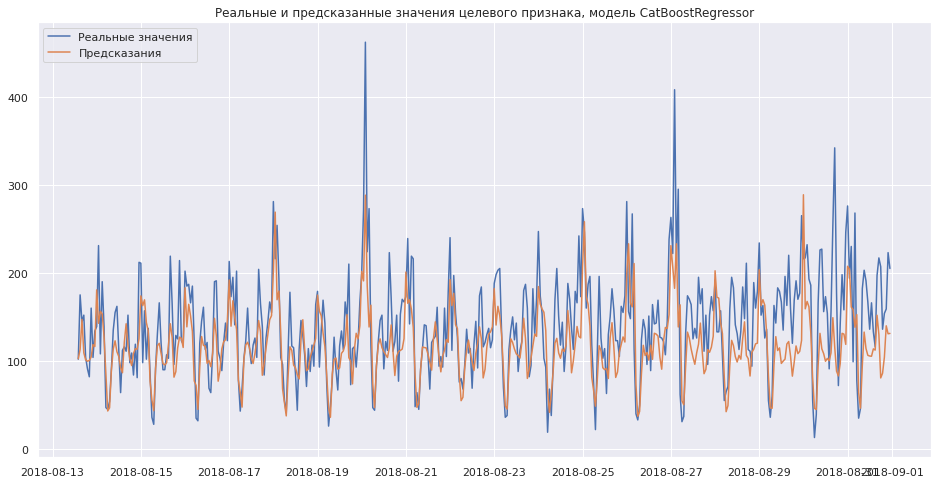

In [30]:
model = CatBoostRegressor(**grid_cbr.best_params_, loss_function="RMSE", verbose=0)

params = str(grid_cbr.best_params_)
model_name = 'CatBoostRegressor'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)
model_performance_plot(model, model_name, features_test, target_test)

### Выводы по шагу 4

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Метрика качества RMSE всех моделей превосходит целевую (не более 48)
* Однако, если вести речь об использовании в продуктивной среде, над оптимальным обучением моделей ещё необходимо поработать: на тестовой выборке метрики ухудшились практически в два раза.
* Анализ графиков показывает, что долгосрочную линию тренда повторяет лишь модель линейной регрессии. Так как подобный анализ рамками проекта не задавался, он вынесен в план работы "на будущее".
* По показателям качества и скорости работы безоговорочно побеждает следующая модель:
    * LGBMRegressor 	{'num_leaves': 41, 'n_estimators': 100, 'learning_rate': 0.04} 	45.937

### Общий вывод

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Данные загружены, проведён технический и визуальный контроль спомощью скользящей средней с окном длиной в неделю
* Проведён ресемплинг данных в разрезы "1 час" и "1 день"
* Проведены проверки на пропуски, монотонность и стационарность
* Выявлен тренд роста в рамках 6-месячного диапазона данных
* Выявлена почасовая сезонность в течение дня

* Обучены четыре модели (Линейная регрессия, случайный лес, LightGBM и CatBoost) и подобраны оптимальные гиперпараметры
* Все модели использовали кросс-валидацию TimeSeriesSplit
* Проверена адекватность моделей, метрика качества RMSE всех моделей превосходит целевую (<=48)
* Выбраны комбинации омделей и геиперпараметров, вышедшие в финал: RandomForestRegressor, LGBMRegressor, CatBoostRegressor

* Метрика RMSE двух моделей (LGBM и CatBoost) на тестовых данных превосходит целевую (<=48)
* По показателям качества и скорости работы выбрана модель LGBMRegressor

Данный проект можно назвать "пристрелочным", т.к. в результате получен соответсвующий критериям пул моделей с очевидным потенциалом для их улучшения.

Тем не менее, для многих применений быстрая реализация машинной модели с приемлмемым качеством может быть критически важной.
